# Instructions

+ Rename this file to `<your nusnetid>.ipynb`. For example, `e0321286.ipynb`.
+ The completed assignment must be uploaded to LumiNUS (Files > Assignment Submissions > PA2)
+ Submission deadline: 11AM, 18th September
+ Late Submission Rules: (1) 10 points will be deducted if submitted after 11 AM, 18th September and before 11 AM, 19th September; (2) Submissions after 11 AM, 19th September will not be graded and will be given **zero** marks.


+ This assignment tests your skills in Feature Selection, Linear Regression, and Classification (Weeks 4 and 5).
+ This assignment is of 20 marks total.
+ The  <font color='purple'> marks </font> associated with each question is mentioned at the end of the question in  <font color='purple'> purple </font> color.
+ Questions with <font color='blue'> blue </font> color are not graded, but you are encouraged to answer them for your better understanding.

## Dataset
In this assignment, we will be using the publicly available weather dataset, which is from the book “Data Mining and Business Analytics with R” (Wiley) written by Johannes Ledolter.  

The weather.csv data set contains 1 year of daily observations from a single weather station (Canberra); n = 366 rows. The data has been processed to provide a binary target variable `RainTomorrow` (whether there is rain during the next day; No/Yes) and a continuous target (risk) variable `RISK_MM` (the amount of rain recorded during the next day). The data set includes the following variables:  

| Variable | Description |
|----------|-------------|
|Date |The date of observation (a date object).
|Location| The common name of the location of the weather station.
MinTemp| The minimum temperature in degrees centigrade.
MaxTemp| The maximum temperature in degrees centigrade.
Rainfall| The amount of rainfall recorded for the day in millimeters. 
Evaporation| Class A pan evaporation (in millimeters) during 24 h (until 9 a.m.). 
Sunshine| The number of hours of bright sunshine in the day.
WindGustDir| The direction of the strongest wind gust in the 24 h to midnight. 
WindGustSpeed| The speed (in kilometers per hour) of the strongest wind gust in the 24 h to midnight.
WindDir9am| The direction of the wind gust at 9 a.m.
WindDir3pm| The direction of the wind gust at 3 p.m.
WindSpeed9am| Wind speed (in kilometers per hour) averaged over 10min before 9 a.m.
WindSpeed3pm| Wind speed (in kilometers per hour) averaged over 10min before 3 p.m.
RelHumid9am| Relative humidity (in percent) at 9 am.
RelHumid3pm| Relative humidity (in percent) at 3 p.m.
Pressure9am| Atmospheric pressure (hpa) reduced to mean sea level at 9 a.m. 
Pressure3pm| Atmospheric pressure (hpa) reduced to mean sea level at 3 p.m. 
Cloud9am| Fraction of sky obscured by cloud at 9 a.m. This is measured in ”oktas,” which are a unit of eighths. It records how many eighths of the sky are obscured by cloud. A 0 measure indicates completely clear sky, while an 8 indicates that it is completely overcast.
Cloud3pm| Fraction of sky obscured by cloud at 3 p.m; see Cloud9am for a description of the values.
Temp9am| Temperature (degrees C) at 9 a.m. Temp3pm: Temperature (degrees C) at 3 p.m.
RainToday| Integer 1 if precipitation (in millimeters) in the 24 h to 9 a.m. exceeds 1 mm, otherwise 0.
RISK_MM| The continuous target variable; the amount of rain recorded during the next day.
RainTomorrow| The binary target variable whether it rains or not during the next day.

Import the necessary packages below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from scipy.stats import chi2, chi2_contingency

import statsmodels.api as sm
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

**Q1) Load Data** <font color='purple'> (0.5) </font>  
Load the csv file to a dataframe `weather`.
+ Create a new dataframe `df` from `weather` by getting rid of the `Date` and `Location` columns.  <font color='purple'> (0.25) </font>
+ Print the number of observations (rows) in `df` where at least one feature is missing.  <font color='purple'> (0.25) </font>

In [2]:
df = pd.read_csv("weather.csv",sep=",")
#print(df)
df.drop(['Date', 'Location'], axis=1, inplace = True) # axis='columns' also works
print(df.columns)
print("Number of rows with at least 1 NaN is ", sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0))


Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
Number of rows with at least 1 NaN is  38


**Q2) Categorical Predictors** <font color='purple'> (0.5) </font>  
+ Create a list of names of **predictors**, `all_predictors`, from columns of `df`. <font color='purple'> (0.25) </font>  
+ Make another list of names of all the nominal predictors `cat_ps`, and print the number of missing observations for each of them. <font color='purple'> (0.25) </font> 

In [3]:
all_predictors = df.columns
#all_predictors = all_predictors.drop("RainTomorrow")
print("all_predictors: ", all_predictors)
df_obj = df.select_dtypes(['object'])
cat_ps = df_obj.columns
#cat_ps = cat_ps.drop("RainTomorrow")
print("cat_ps: ", cat_ps)


cat_data = df[cat_ps]
#print(cat_data)
print(cat_data.isnull().sum(axis = 0))

all_predictors:  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
cat_ps:  Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')
WindGustDir      3
WindDir9am      31
WindDir3pm       1
RainToday        0
RainTomorrow     0
dtype: int64


**Q3) Independence Test for Categorical Variables** <font color='purple'> (4.5) </font>  
Learn about [Chi-square test](https://www.mathsisfun.com/data/chi-square-test.html) to answer this question. 
Use Chi-squre test to find out the nominal categorical predictors that do not affect our target variable `RainTomorrow` significantly. We say a categorical variable to be not independent of `RainTomorrow`, if the p-value of corresponding Chi-squared test is lesser than 0.05; otherwise it is independent.  
You can refer to [this article](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/) to know how to do chi-square test in python. 
+ For each nominal categorical predictor, run the chi-square test with the categorical target variable `RainTomorrow`. Print the chi-square statistic and p-value for each test. <font color='purple'> (3) </font>
+ Print the names of all the nominal categorical predictors `ind_cps`, which are independent from the target variable. <font color='purple'> (1) </font>
+ As the features in `ind_cps` are independent of target variable, they will not be contributing in the prediction task. So let's drop them from `df`. After dropping, print the number of observations in `df` in which atleast one feature is missing. After printing, drop all the missing observations from `df`. <font color='purple'> (0.5) </font>

Hint: Use `pivot_table` for making the contingency table.

In [4]:
cat_data
#pd.pivot_table(cat_data,index=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"])

cols = [3]
targetVar = df["RainTomorrow"]
#print(targetVar)

ind_cps = []
for i in cat_ps:
    if i != "RainTomorrow":
        print("\n",i)
        catVar = cat_data[i].to_frame()
        data = pd.merge(catVar, targetVar, left_index=True, right_index=True)
        data = data.pivot_table(index='RainTomorrow', columns=i, aggfunc=len, fill_value=0)        
        #print(data)
        stat, p, dof, expected = chi2_contingency(data)
        print("chi-square statistic = ",stat)
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        #print("probability= %.3f, critical = %.3f, stat= %.3f" % (prob, critical, stat))
        if abs(stat) >= critical:
            print('Dependent (reject H0)')
        else:
            print("Independent (fail to reject H0)")
        
        alpha = 1.0 - prob
        print("Significance = %.4f, p = %.4f" % (alpha, p))
        if p <= alpha:
            print("Dependent (reject H0)")
        else:
            print("Independent (fail to reject H0)")
            ind_cps.append(i)
            

print("\n ind_cps:", ind_cps)

#df = df.drop("RainTomorrow")


print(df.columns)
for i in ind_cps:
    df = df.drop(columns = i)
    
print(df.columns)


print("Number of rows with at least 1 NaN after dropping independent var is ", sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0))
df = df.dropna()
print("Number of rows with at least 1 NaN after dropping nan observation is ", sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0))




 WindGustDir
chi-square statistic =  26.64304182990529
Dependent (reject H0)
Significance = 0.0500, p = 0.0318
Dependent (reject H0)

 WindDir9am
chi-square statistic =  23.59711614819
Independent (fail to reject H0)
Significance = 0.0500, p = 0.0723
Independent (fail to reject H0)

 WindDir3pm
chi-square statistic =  8.413159375093347
Independent (fail to reject H0)
Significance = 0.0500, p = 0.9062
Independent (fail to reject H0)

 RainToday
chi-square statistic =  9.2457935261708
Dependent (reject H0)
Significance = 0.0500, p = 0.0024
Dependent (reject H0)

 ind_cps: ['WindDir9am', 'WindDir3pm']
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')
Index(['MinTemp', 'MaxTemp', 'Rainfa

**Q4) Numerical Feature Analysis** <font color='purple'> (1.5) </font>
+ Make a list of all the numerical (both ordinal and real-valued) variables `num_vs` in `df` including the target variable `RISK_MM`. Plot the heatmap of correlations among all the numerical variables. Also, plot the scatterplot matrix. <font color='purple'> (1) </font>
+ Using these figures as a guide, identify and print atleast 3 pairs of variables that are highly collinear. <font color='purple'> (0.5) </font>

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')
3 pairs of highly collinear variables are: 1) Pressure3pm & Pressure9am   2)Temp3pm & MaxTemp   3)Temp9am & MinTemp


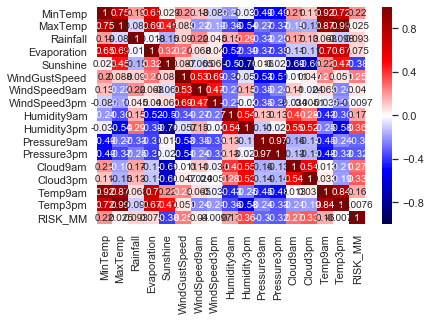

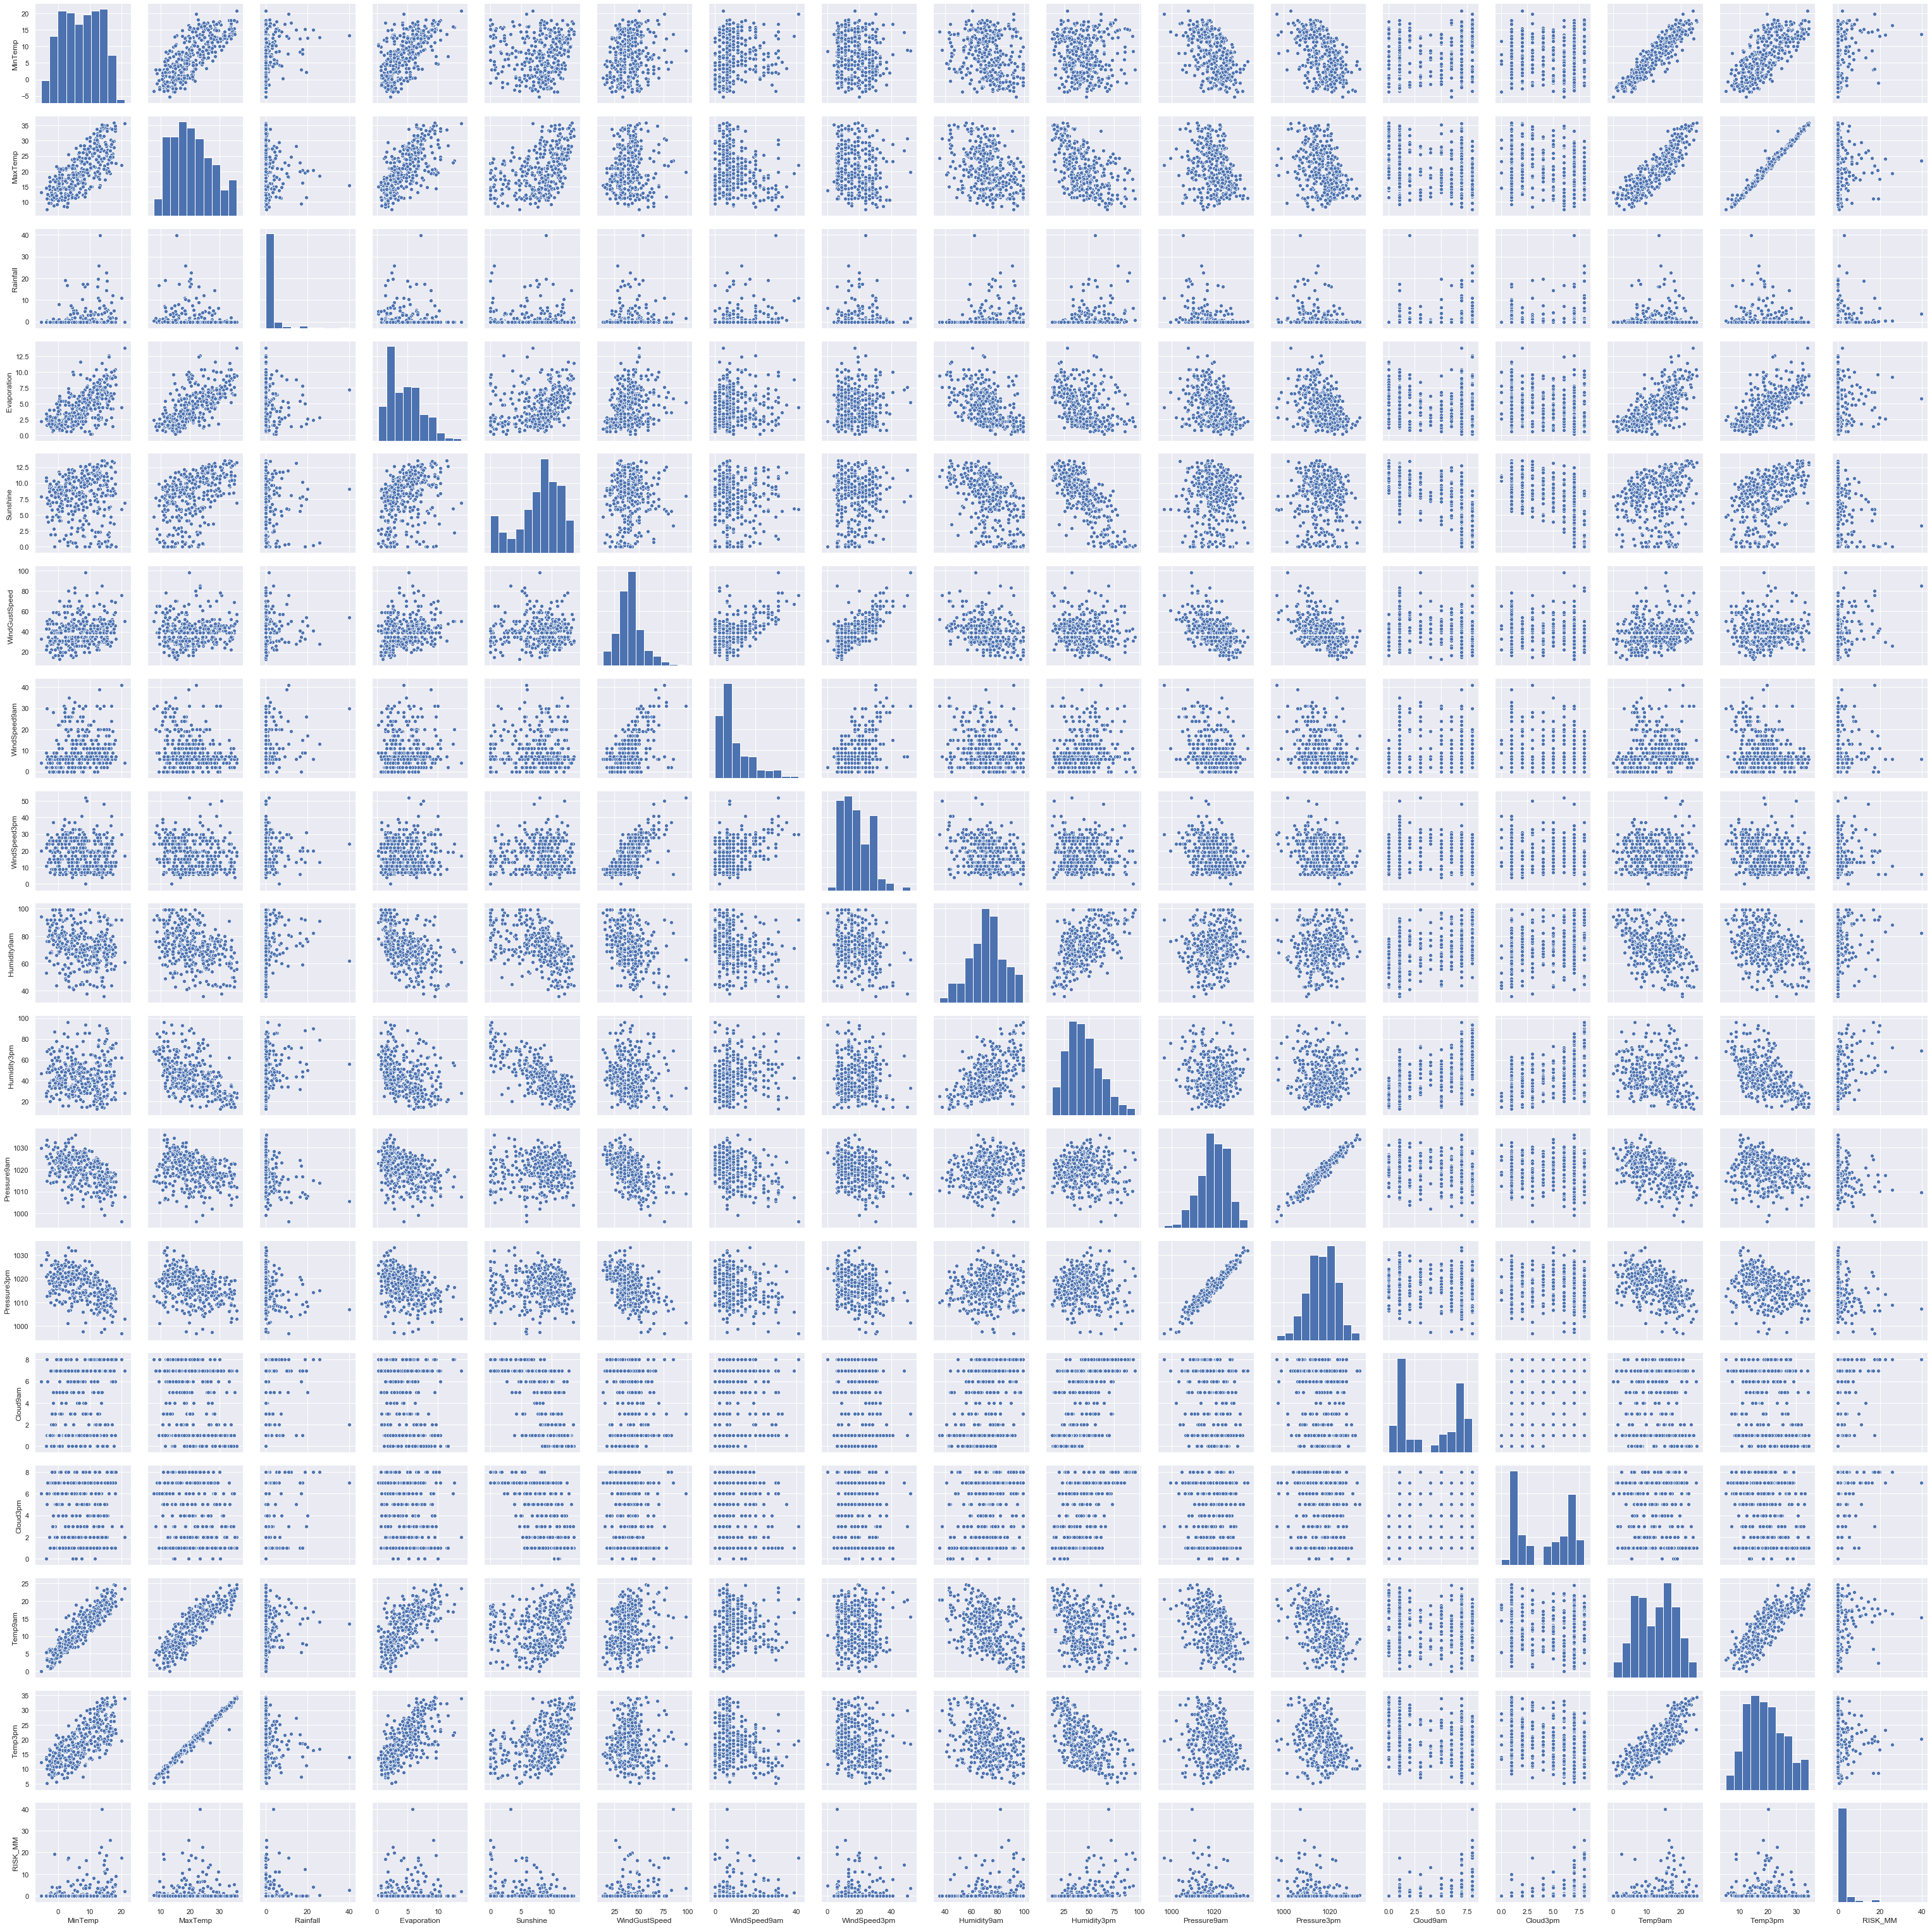

In [5]:
df_numerical = df.select_dtypes(include = [np.float64, np.int64])
num_vs = df_numerical.columns
print(num_vs)


correlation_matrix = df_numerical.corr()
sns.heatmap(data=correlation_matrix, cmap='seismic',annot=True, vmin=-1, vmax=1)
sns.pairplot(df_numerical)

print("3 pairs of highly collinear variables are: 1) Pressure3pm & Pressure9am   2)Temp3pm & MaxTemp   3)Temp9am & MinTemp")

**Q5) Simple Linear Regression** <font color='purple'> (3) </font>
+ Using `RISK_MM` as the response variable, fit simple linear regression models (using the `statsmodels` package), for each of the numerical predictor variables, i.e. one model with each predictor (exclude `RISK_MM`). For each model selectively print a) coefficient of the predictor, b) its standard deviation, and c) its p-value. <font color='purple'> (2) </font>

+ In which of these models, is there a statistically significant (significance level is 95%) association between the predictor and response variable?  Use the relevant statistic for finding this answer. <font color='purple'> (0.5) </font>

+ Print the predictor whose model has the best R2 value. <font color='purple'> (0.5) </font>

In [6]:
linear_vs = num_vs.drop("RISK_MM")
print(linear_vs)

stat_sig = []
base = 0

for i in linear_vs:
    X = df[[i]]
    y = df[['RISK_MM']]
    lin = sm.OLS(y, sm.add_constant(X)).fit()
    #print(dir(lin))
    a = lin.params
    b = lin.bse[1]
    c = lin.pvalues[1]
    if c < 0.05 :
        stat_sig.append(i)
    if lin.rsquared >= base:
        base = lin.rsquared
        goodr2 = i
    print("PREDICTOR: ", i)
    print("Coeef of predictor: ", a[1])
    print("standDev: ", lin.bse[1])
    print("p-value: ", lin.pvalues[1]) 
    print("\n")
    #print(lin.summary())
    

    
print("Predictor with p-value < 0.05 is statistically significant:")
print(stat_sig)
print("\n")

print("Best r2 is high r2:")
print(goodr2, base)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
PREDICTOR:  MinTemp
Coeef of predictor:  0.15467610722152636
standDev:  0.03712118415544879
p-value:  3.8940475117279215e-05


                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     17.36
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           3.89e-05
Time:                        09:08:21   Log-Likelihood:                -1005.8
No. Observations:                 353   AIC:                             2016.
Df Residuals:                     351   BIC:         

PREDICTOR:  Pressure3pm
Coeef of predictor:  -0.21732473573182293
standDev:  0.03394715666910357
p-value:  4.922618757050428e-10


                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     40.98
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           4.92e-10
Time:                        09:08:22   Log-Likelihood:                -994.79
No. Observations:                 353   AIC:                             1994.
Df Residuals:                     351   BIC:                             2001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]

**Q6) Automatic Feature selection** <font color='purple'> (1) </font>
+ Use scikit-learn's [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest) operation to select 6 features from the list of numerical feature predictors with `RISK_MM` as the response variable. Print the name of selector features. <font color='purple'> (1) </font>

In [7]:
features = num_vs.drop("RISK_MM")
#print(features)
X = df[features]
#print(X)
y = df["RISK_MM"]
selector =  SelectKBest(f_regression, k=6)
bestFeatures = selector.fit_transform(X, y)

predictors = []
#print(selector.get_support())

for i in range(len(selector.get_support())):
    if (((selector.get_support())[i])):
        predictors.append(features[i])
        

print(predictors)

['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']


**Q7) Multiple Linear Regression** <font color='purple'> (2) </font>
+ Using the predictors obtained in the previous question, create a multiple regression model to predict `RISK_MM`. Print the summary of the result. <font color='purple'> (1) </font>

+ Compare (print) the RSE of this model with the model having the best R2 in question 4. <font color='purple'> (1) </font>  
<font color='blue'> Do you see any significant improvement? </font>

In [8]:
X = df[predictors]
multlin = ols(formula='RISK_MM ~'+ ' + '.join(predictors), data=df).fit()
print(multlin.summary(), "\n")



𝐗 = df[predictors]
𝐲 = df['RISK_MM']
ℳ = LinearRegression()
ℳ.fit(X,y)
𝐲̂ = ℳ.predict(𝐗)

𝐜𝐗 = 𝐗.copy()
𝐜𝐗.insert(loc=0, column='const', value=1)
n, p = 𝐜𝐗.shape
# print(n, p)
# print(𝐜𝐗.shape)

𝛆 = 𝐲-𝐲̂  # residuals
RSS = sum(𝛆**2) # Residual sum of squares
RSE = np.sqrt(RSS/(n-p))  # Residual standard error

print("RSE of multiple regression: ", RSE)



𝐗 = df[goodr2]
𝐗=np.array(𝐗).reshape(-1, 1) 

𝐲 = df['RISK_MM']
ℳ = LinearRegression()
ℳ.fit(X,y)
𝐲̂ = ℳ.predict(𝐗)

𝐜𝐗 = 𝐗.copy()
n, p = 𝐜𝐗.shape
p = 2

𝛆 = 𝐲-𝐲̂  # residuals
RSS = sum(𝛆**2) # Residual sum of squares
RSE2 = np.sqrt(RSS/(n-p))  # Residual standard error

print("RSE of linear regression: ", RSE2)


                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     23.49
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.79e-23
Time:                        09:08:22   Log-Likelihood:                -953.97
No. Observations:                 353   AIC:                             1922.
Df Residuals:                     346   BIC:                             1949.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     230.7743     32.722      7.053      

**Q8) Classification** <font color='purple'> (3) </font>  
+ Make a dataframe `X_num` having the numerical predictors obtained in the Q6 . Create a Response variable `Y` which has value 1 if `RainTomorrow` is *Yes*, otherwise 0. Split this `X_num,Y` data to train (80%) and test (20%) data. <font color='purple'> (1) </font>
+ Using the sklearn package, fit classification models Logistic Regression and K-Nearest Neighbors (for any choice of K) on training data to predict if there will be rain tomorrow. After fitting each model, predict on the test dataset and print the following (using sklearn.metrics): <font color='purple'> (2) </font>
    1. confusion matrix
    2. accuracy
    3. precision
    4. recall

In [9]:
X_num = df[predictors]
X_num
Y = df["RainTomorrow"]
Y = Y.replace(to_replace=['No', 'Yes'], value=[0, 1])

testsize = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_num, Y, test_size = testsize, random_state = seed)
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

print("Logistic Regression:")
print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))


print("\n")

#KNN, n = 3
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
print("KNN: ")
print("Confusion matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))

Logistic Regression:
Confusion matrix:
[[60  2]
 [ 7  2]]
Accuracy:  0.8732394366197183
Precision: 0.5
Recall: 0.2222222222222222


KNN: 
Confusion matrix:
[[57  5]
 [ 5  4]]
Accuracy:  0.8591549295774648
Precision: 0.4444444444444444
Recall: 0.4444444444444444


**Q9) Decision Tree Classification** <font color='purple'> (4) </font>  
To answer this quesion, learn about Decision tree Classifiers. You may follow the these links: [A Light Intro to Decision Trees](https://medium.com/meta-design-ideas/decision-tree-a-light-intro-to-theory-math-code-10dbb3472ec4), [Decision trees with a toy task and the UCI Adult dataset](https://www.kaggle.com/annijadaugaviete/3-decision-trees).

+ Create a dataframe `X` from `df` such that it includes the following:
    - 6 numerical predictors found in Q6, and
    - One Hot Encodings of the relevant categorical predictors (not independent) found in Q3. (Hint: Use `get_dummies`)  
    print the number of columns in `X`. <font color='purple'> (1) </font>

+ Split the data `X, Y` (Y is same as previous question) into train(80%) and test (20%). Fit a decision tree classifier on the training data with a maximum depth of 3. Print the confusion matrix, and accuracy score of this classifier on test data. <font color='purple'> (2) </font>

+ Use grid search on the training data with 5-fold cross validation and `roc_auc` scoring to find (print) the best maximum depth of decison tree. Use [2,3,4,5] as grid values to optimize over. Print the confusion matrix, and accuracy score of the best estimator on test data. <font color='purple'> (1) </font>

In [10]:
X = df[predictors]
cat_pred = cat_ps.drop(ind_cps)
cat_pred = cat_pred.drop("RainTomorrow")
cat_pred = df[cat_pred]
#print(cat_pred)
hotEncod = pd.get_dummies(cat_pred)
X = pd.merge(X, hotEncod, left_index=True, right_index=True)

print("Number of columns in X: ", len(X.columns))

testsize = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_num, Y, test_size = testsize, random_state = seed)

Number of columns in X:  24


In [11]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_tree.fit(X_train,Y_train)
tree_predictions = clf_tree.predict(X_test)
accuracy_score(Y_test, tree_predictions)
print("confusion matrix:")
print(confusion_matrix(Y_test, tree_predictions))
print("accuracy score: ", accuracy_score(Y_test, tree_predictions))

confusion matrix:
[[54  8]
 [ 5  4]]
accuracy score:  0.8169014084507042


In [12]:
tree = DecisionTreeClassifier()
hps = dict(max_depth= [2,3,4,5])

estimator = GridSearchCV(tree, hps, return_train_score=True, scoring='roc_auc', cv=5)
estimator.fit(X_train,Y_train)

print('Best hyperparameter:', estimator.best_params_)
print(estimator.best_params_['max_depth'])

scores = cross_val_score(estimator, X, Y, cv=5, scoring='roc_auc')
#print('AUC = {:.3f} mean  +/-  {:.3f} std'.format(scores.mean(), scores.std()))


clf_tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=estimator.best_params_['max_depth'], random_state=0)
clf_tree2.fit(X_train,Y_train)
tree_predictions = clf_tree2.predict(X_test)
accuracy_score(Y_test, tree_predictions)
print("confusion matrix:")
print(confusion_matrix(Y_test, tree_predictions))
print("accuracy score: ", accuracy_score(Y_test, tree_predictions))

Best hyperparameter: {'max_depth': 2}
2


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selec

confusion matrix:
[[57  5]
 [ 6  3]]
accuracy score:  0.8450704225352113


/Users/apple/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
